# Lab:  Logistic Regression for Gene Expression Data

In this lab, we use logistic regression to predict biological characteristics ("phenotypes") from gene expression data.  In doing this lab, you will learn to:
* Handle missing data
* Perform multi-class logistic classification
* Create a confusion matrix


## Background

Genes are the basic unit in the DNA and encode blueprints for proteins.  When proteins are synthesized from a gene, the gene is said to "express".  Micro-arrays are devices that measure the expression levels of large numbers of genes in parallel.  By finding correlations between expression levels and phenotypes, scientists can identify possible genetic markers for biological characteristics.

The data in this lab comes from:

https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

In this data, mice were characterized by three properties:
* Whether they had down's syndrome (trisomy) or not
* Whether they were stimulated to learn or not
* Whether they had a drug memantine or a saline control solution.

With these three choices, there are 8 possible classes for each mouse.  For each mouse, the expression levels were measured across 77 genes.  We will see if the characteristics can be predicted from the gene expression levels.  This classification could reveal which genes are potentially involved in Down's syndrome and if drugs and learning have any noticeable effects.


**Submission**:  Complete all sections labeled `#TODO`.  Run the notebook and print to PDF.  Submit the PDF.  Do not submit any other format.

## Load the Data

We begin by loading the standard modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

Use the `pd.read_excel` command to read the data from 

https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls

into a dataframe `df`.  Use the `index_col` option to specify that column 0 is the index.  Use the `df.head()` to print the first few rows.

In [2]:
# TODO
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls',
                   index_col=0,na_values='NA')
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


This data has missing values.  The site:

http://pandas.pydata.org/pandas-docs/stable/missing_data.html

has an excellent summary of methods to deal with missing values.  Following the techniques there, create a new data frame `df1` where the missing values in each column are filled with the mean values from the non-missing values.

In [3]:
# TODO
df1 = df.fillna(df.mean())

## Binary Classification for Down's Syndrome

We will first predict the binary class label in `df1['Genotype']` which indicates if the mouse has Down's syndrome or not.  Get the string values in `df1['Genotype'].values` and convert this to a numeric vector `y` with 0 or 1.  You may wish to use the `np.unique` command with the `return_inverse=True` option.

In [4]:
# TODO
y = np.unique(df1['Genotype'].values, return_inverse=True)[1]
y

array([0, 0, 0, ..., 1, 1, 1])

As predictors, get all but the last four columns of the dataframes.  Store the data matrix into `X`.  

In [5]:
# TODO
X = df1.iloc[:, :-4]

Split the data into training and test with 30% allocated for test.  You can use the train

In [6]:
from sklearn.model_selection import train_test_split

# TODO:
Xtr, Xts, ytr, yts = train_test_split(X, y, shuffle = True, test_size = 0.3, random_state = 111)

Scale the data with the `StandardScaler`.  Store the scaled values in `Xtr1` and `Xts1`. 

In [7]:
from sklearn.preprocessing import StandardScaler

# TODO
scaler = StandardScaler()
scaler.fit(X)
Xtr1 = scaler.transform(Xtr)
Xts1 = scaler.transform(Xts)

Create a `LogisticRegression` object `logreg` and `fit` on the scaled training data.  Set the regularization level to `C=1e5` and use the optimizer `solver=liblinear`. 

In [8]:
# TODO
logreg = linear_model.LogisticRegression(C=1e5, solver='liblinear')
logreg.fit(Xtr1,ytr)

LogisticRegression(C=100000.0, solver='liblinear')

Measure the accuracy of the classifer on test data.    

In [9]:
# TODO
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print('The accuracy is: %.3f' %acc)

The accuracy is: 0.957


## Interpreting the weight vector

Create a stem plot of the coefficients, `W` in the logistic regression model.  Jse the `plt.stem()` function with the `use_line_collection=True` option.  You can get the coefficients from `logreg.coef_`, but you will need to reshape this to a 1D array.  

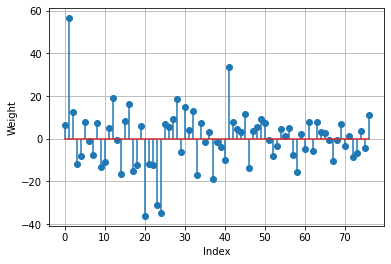

In [10]:
# TODO
W = np.reshape(logreg.coef_, (77,1))
plt.stem(W, use_line_collection=True)
plt.xlabel('Index')
plt.ylabel('Weight')
plt.grid()

You should see that `W[i]` is very large for a few components `i`.  These are the genes that are likely to be most involved in Down's Syndrome.   Below we will use L1 regression to enforce sparsity.  Find the names of the genes for two components `i` where the magnitude of `W[i]` is largest.  

The accuracy is: 0.954
Two most likely involved in Down's Syndrome genes are  BRAF_N  and  ITSN1_N


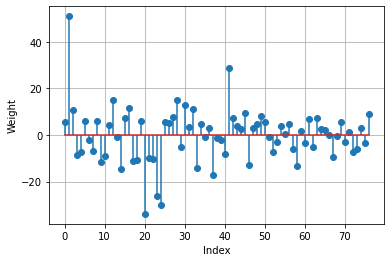

In [11]:
# TODO
logreg1 = linear_model.LogisticRegression(C=1e5, solver='liblinear', penalty='l1')
logreg1.fit(Xtr1,ytr)
yhat1 = logreg1.predict(Xts1)
acc1 = np.mean(yhat1 == yts)
print('The accuracy is: %.3f' %acc1)

W1 = np.reshape(logreg1.coef_, (77,1))
plt.stem(W1, use_line_collection=True)
plt.xlabel('Index')
plt.ylabel('Weight')
plt.grid()

max1, max2 = abs(W1[:,0]).argsort()[-2:]
print('Two most likely involved in Down\'s Syndrome genes are ', df.columns[max1], ' and ', df.columns[max2])

## Cross Validation

To obtain a slightly more accurate result, now perform 10-fold cross validation and measure the average precision, recall and f1-score.  Note, that in performing the cross-validation, you will want to randomly permute the test and training sets using the `shuffle` option.  In this data set, all the samples from each class are bunched together, so shuffling is essential.  Print the accuracy across all the folds.

In [12]:
# TODO
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

Xs = preprocessing.scale(X)
nfold = 10
kf = KFold(n_splits=nfold, shuffle=True)
acc = []

for Itr, Its in kf.split(Xs):
    Xtr = Xs[Itr, :]
    ytr = y[Itr]
    Xts = Xs[Its, :]
    yts = y[Its]
    
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    acci = np.mean(yhat == yts)
    acc.append(acci)
    
accm = np.mean(acc)

print('The mean accuracy is: %.3f' %accm)

The mean accuracy is: 0.963


## Multi-Class Classification

Now use the response variable in `df1['class']`.  This has 8 possible classes.  Use the `np.unique` funtion as before to convert this to a vector `y` with values 0 to 7.

In [13]:
# TODO
y = np.unique(df1['class'].values, return_inverse=True)[1]
y

array([0, 0, 0, ..., 7, 7, 7])

Fit a multi-class logistic model by creating a `LogisticRegression` object, `logreg` and then calling the `logreg.fit` method.

A common way to measure errors in multi-class classification is with a *confusion matrix*.  A confusion matrix is a matrix `C` where `C[i,j]` is the number o where `ytrue==i` and `yhat==j`. You can use the `confusion_matrix` method in the `sklearn` package to compute the confusion matrix.


Perform 10-fold cross validation, and measure the confusion matrix `C` on the test data in each fold using the `confusion_matrix` command.  Add the confusion matrix counts across all folds and then normalize the rows of the confusion matrix so that they sum to one.  Thus, each element `C[i,j]` will present the fraction of time `yhat=j` given `ytrue=i`.  Print the normalized confusion matrix.  You can use the command

    print(np.array_str(C, precision=4, suppress_small=True))
    
to create a nicely formatted print.  Also print the overall mean and SE of the test accuracy across the folds.

In [14]:
logreg = linear_model.LogisticRegression(C=1e5, solver='liblinear', multi_class='ovr')
logreg.fit(Xs,y)

yhat = logreg.predict(Xs)
acc = np.mean(yhat == y) 

print('The accuracy is: %.3f' %acc)

The accuracy is: 1.000


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

nfold = 10
kf = KFold(n_splits=nfold, shuffle=True)
prec = []
rec = []
f1 = []
acc = []
C = np.zeros((8,8))

for Itr, Its in kf.split(Xs):
    Xtr = Xs[Itr, :]
    ytr = y[Itr]
    Xts = Xs[Its, :]
    yts = y[Its]
    
    logreg.fit(Xtr, ytr)
    yhat = logreg.predict(Xts)
    
    preci, reci, f1i,_ = precision_recall_fscore_support(yts, yhat)    
    acci = np.mean(yhat == yts)
    prec.append(preci)
    rec.append(reci)
    f1.append(f1i)   
    acc.append(acci)
    C = C + confusion_matrix(yts, yhat)
    
precm = np.mean(prec)
recm = np.mean(rec)
f1m = np.mean(f1)
accm = np.mean(acc)
accsd = np.std(acc)
C = C / C.sum(axis=1)

print(np.array_str(C, precision=4, suppress_small=True))
print('The mean and std error of the test accuracy are: %.3f '% accm, ' and %.3f' % accsd)

[[0.98   0.0148 0.     0.     0.     0.0095 0.     0.    ]
 [0.02   0.9704 0.     0.     0.0074 0.     0.     0.    ]
 [0.     0.0074 0.9867 0.     0.0074 0.     0.     0.    ]
 [0.02   0.     0.0067 0.9704 0.     0.     0.     0.    ]
 [0.     0.0074 0.     0.     0.9926 0.     0.     0.    ]
 [0.0067 0.     0.     0.     0.     0.9905 0.     0.    ]
 [0.     0.0074 0.     0.0074 0.     0.     0.9852 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]
The mean and std error of the test accuracy are: 0.984   and 0.010
